In [104]:
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
# https://seaborn.pydata.org/examples/index.html

# I am going to start by importing libraries

# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms to test
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [105]:
# Now, lets get the data from Titanic challenge


test_ttn = pd.read_csv(r'C:\Users\pedro\Documents\Data Science\datasets\titanic\titanic_test.csv')
train_ttn = pd.read_csv(r'C:\Users\pedro\Documents\Data Science\datasets\titanic\titanic_train.csv')

In [106]:
train_ttn.info()
train_ttn.shape

# the target variable is Survived. It is possible to see we have integer, objects and floats.
# according to the instructions, sibsp represents the # of siblings / spouses aboard the Titanic
# according to the instructions, parch represents the # of parents / children aboard the Titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [107]:
train_ttn.head()

# There is NaN  values in Cabin column. Tickets may cause a problem because they have different format but I am assuming it does not have much impact on deciding whether a passenger will survive or not. Some are just numbers, others include letters, characters and numbers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
# Now, I am going to check what is missing

total = train_ttn.isnull().sum().sort_values(ascending=False)
total.head(len(train_ttn.columns))

# So, there are 687 values missing in Cabin, 177 in age and 2 in Embarket
# All the variables should be considered to get the y (Survived) except for Ticket, Name and PassengerId

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [109]:
train_ttn.describe()

# As we can see here, there were 891 passengers; since Survived is a dummy variable, around 38% of the passengers included in the training-set survived; most passengers were more or less between 2nd and 3rd classes; average age is around 30 years, but there was at least a baby on board since the min age is 0.42

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


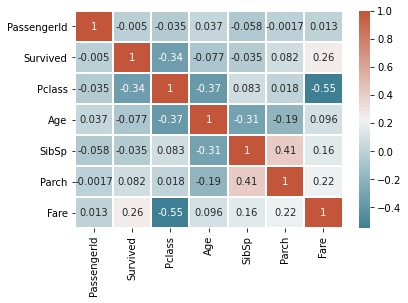

<Figure size 864x864 with 0 Axes>

In [110]:
# Now lets check if there is any correlation between any pair of variables (which I do not believe) but I am just going to confirm because if there is high correlation between variables they are telling the same thing and I do not want several variables telling the same thing.

train_ttn.corr()
sns.heatmap(train_ttn.corr(),annot=True, linewidth=1, cmap = sns.diverging_palette(220,20,as_cmap=True))
plt.figure(figsize=(12,12))
plt.show()

# Except for the diagonal, everything looks ok, so there is no need to drop any variable.

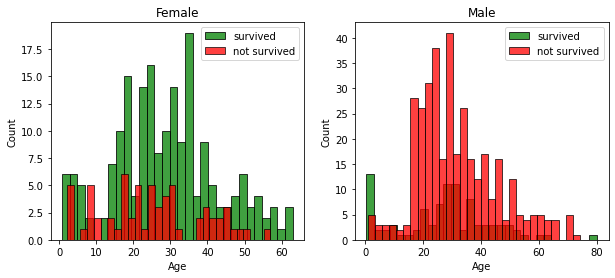

In [111]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_ttn[train_ttn['Sex']=='female']
men = train_ttn[train_ttn['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=30, color = 'green', label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=30, color = 'red', label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=30, color = 'green', label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=30, color = 'red', label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


# The initial displot I was trying to create delivered an error, should try it again later, it said distplot did not exist...
# As we can see according to the graphs, more females survived comparing to males but the biggest difference is when we look to the ones who died because much more males died comparing to females. It is also noticeable that children have higher survival chances comparing to males. This might be due to chivalry.

In [112]:
female_survived = len(women[women['Survived']==1])
female_not_survived = len(women[women['Survived']==0])
male_survived = len(men[men['Survived']==1])
male_not_survived = len(men[men['Survived']==0])

# Now I am going to create age groups to better categorise the data
age_groups = pd.cut(train_ttn['Age'], bins=8)

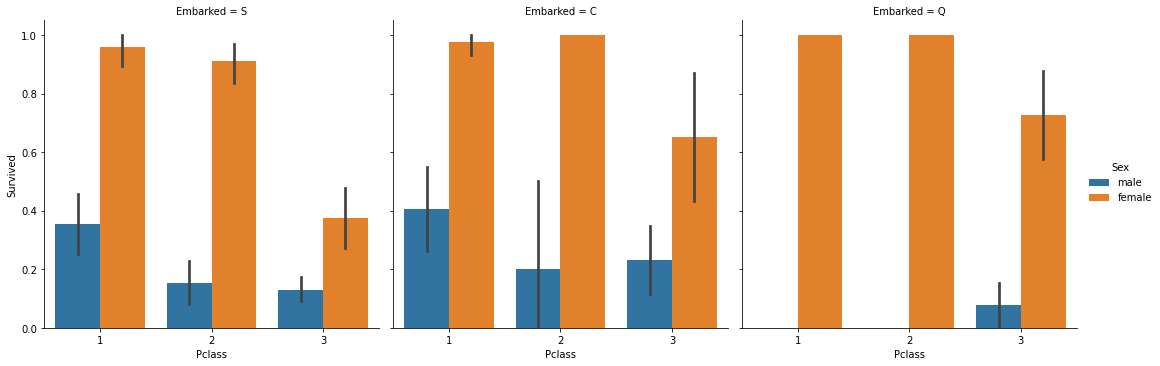

In [113]:
survived_embarked = sns.catplot(data= train_ttn, kind = 'bar', x = "Pclass", y = 'Survived', hue = 'Sex', col='Embarked')
plt.show()

# Embarked is the port of Embarkation and there are three: C = Cherbourg, Q = Queenstown, S = Southampton. It seems like males have lower chances of surviving when they embarke in port Q and females is more or less the same for the first and second classes.

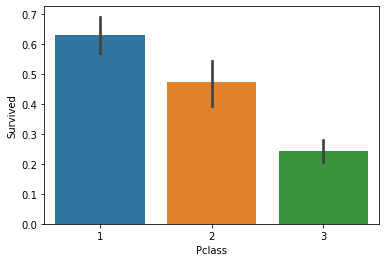

In [114]:
# I am going to check if there is any relationship between survivorship and Passenger class which can be seen as a relationship between survival and socioeconomic status.

sns.barplot(data = train_ttn, x = 'Pclass', y = 'Survived')

# It seems like passengers from more premium classes have higher chances of survival, maybe because of the location of their rooms.

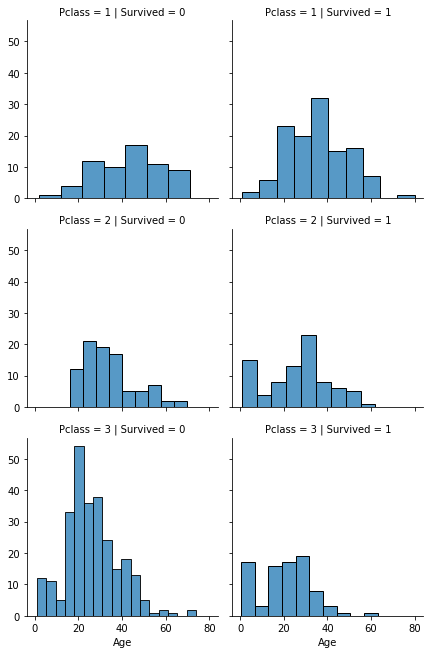

In [115]:
class_survived_age = sns.FacetGrid(data = train_ttn, col = 'Survived', row = 'Pclass')
class_survived_age.map_dataframe(sns.histplot, x = 'Age')
class_survived_age.set_axis_labels('Age')
class_survived_age.add_legend()

# It is possible to see that the class has a real effect on the survival rate and in some cases it is possible to clearly see that it has different effects for different age groups (ex: individuals aged between 20-35 from class 3)

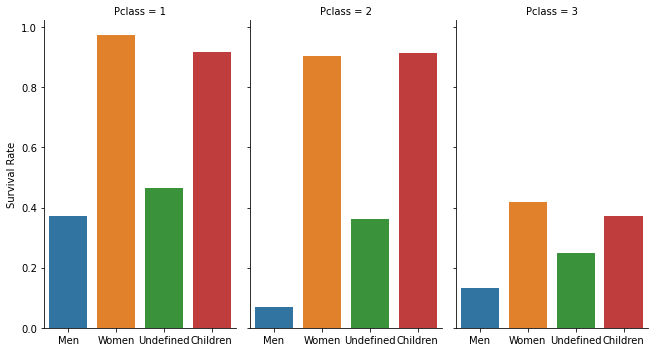

In [116]:
# Just out of curiosity lets create a variable called "Who" to see the difference in survival rates among Men, Women and Children.

who_conditions = [(train_ttn['Sex'] == 'male') & (train_ttn['Age'] >= 18), (train_ttn['Sex'] == 'female') & (train_ttn['Age'] >= 18), (train_ttn['Age'] < 18), (train_ttn['Age'].isnull())]
who_values = ['Men', 'Women', 'Children', 'Undefined']
train_ttn['Who'] = np.select(who_conditions, who_values)

# Search for how to address NA values in the age column
# Here: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

class_survived_age_2 = sns.catplot(data = train_ttn, x = 'Who', y = 'Survived', col = 'Pclass', kind = 'bar', aspect = 0.6, ci= None)
class_survived_age_2.set_axis_labels("", "Survival Rate")

# Men have much lower chance of survival when in class 2 and 3. For women and children it is similar to be in class 1 or 2.


# See this: https://seaborn.pydata.org/generated/seaborn.catplot.html

In [117]:
# sibsp represents the number of siblings / spouses aboard the Titanic
# parch represents the number of parents / children aboard the Titanic

# So, my thiking here was based on the genealogy. sibsp represents what I consider "horizontal relationships" because these relatives are similar to the passenger in terms of line and/or age. Parch is what I consider "verical relationships" because there is a degree of kinship between the passenger and the relative because the passenger either is a parent or a son of of its relative.
# I will now create a variable that sums up both vertical and horizontal relationships called number_relatives

for dataset in train_ttn:
    train_ttn ['number_relatives'] = train_ttn['SibSp'] + train_ttn['Parch']
    train_ttn.loc [train_ttn['number_relatives'] > 0, 'alone'] = 0
    train_ttn.loc [train_ttn['number_relatives'] == 0, 'alone'] = 1
    train_ttn ['alone'] = train_ttn['alone'].astype(int)
    
train_ttn ['alone'].value_counts()

for dataset in test_ttn:
    test_ttn ['number_relatives'] = test_ttn['SibSp'] + test_ttn['Parch']
    test_ttn.loc [test_ttn['number_relatives'] > 0, 'alone'] = 0
    test_ttn.loc [test_ttn['number_relatives'] == 0, 'alone'] = 1
    test_ttn ['alone'] = test_ttn['alone'].astype(int)

[(-0.5, 8.0)]

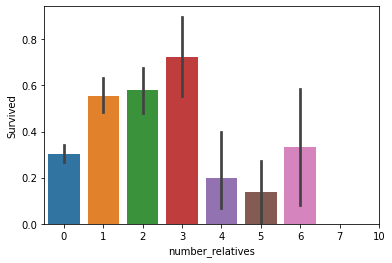

In [118]:
relatives_plot = sns.barplot(data = train_ttn, x = 'number_relatives', y = 'Survived')
relatives_plot.set(xlim=(-0.5,8))

# The number of relatives has a clear influence on the survival rate of passengers. Passengers who have 4 or 5 relatives on board have much less chances to survive.

[(-0.5, 8.0)]

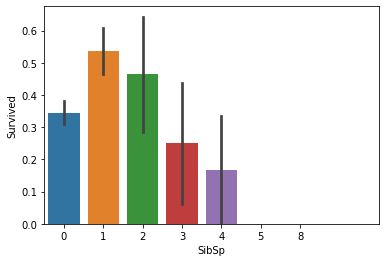

In [119]:
sibsp_plot = sns.barplot(data = train_ttn, x = 'SibSp', y = 'Survived')
sibsp_plot.set(xlim=(-0.5,8))

[(-0.5, 8.0)]

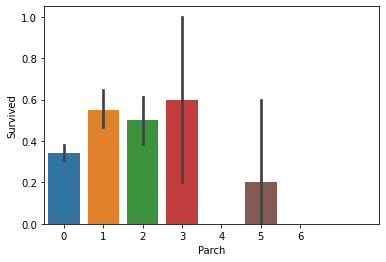

In [120]:
parch_plot = sns.barplot(data = train_ttn, x = 'Parch', y = 'Survived')
parch_plot.set(xlim=(-0.5,8))

# As we can see, horizontal and vertical relationships have different influences over the chance of survival.

In [121]:
# Now, I will start the data preprocessing by addressing missing values, then value formats, then group variables into categories before start testing the models.

In [122]:
# Missing data

total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [123]:
# There are a lot of missing values in cabin column and age. Have to check if these randomly missing because these variables are important for the model.
# To check for randomness of missing values I am going to use the output variable (Survived).

print('survival rate for missing Cabin values: ', train_ttn[train_ttn['Cabin'].isnull()].loc[:, 'Survived'].mean())
print('survival rate for missing Age values: ', train_ttn[train_ttn['Age'].isnull()].loc[:, 'Survived'].mean())
print('general survival rate: ', train_ttn['Survived'].mean())

print('percentage of missing Cabin values: ', train_ttn['Cabin'].isnull().sum()/train_ttn['Cabin'].isnull().count())

# Survival percentages of Cabin and Age missing values are not very different between themselves and comparing to the general survival rate.
# Cabin has almost 77% of values missing, this is a lot. I do not think it will be benefitial to predict such a number of cases considering that I would not merely predicting a few values but a lot of values at random because Titanic certainly had a lot of cabins. I think this would just result in noise.

survival rate for missing Cabin values:  0.29985443959243085
survival rate for missing Age values:  0.2937853107344633
general survival rate:  0.3838383838383838
percentage of missing Cabin values:  0.7710437710437711


In [124]:
data = [train_ttn, test_ttn]

# I was not able to use this for the expressions "for dataset in data" because it was delivering an error and I could not find solution for it, so I just did the same twice since I am only using two datasets this is not a big problem.

In [125]:
# Regarding Cabin I will follow a suggestion I found on the internet saying that we can use Cabin to create a variable named Deck. Explanation: A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.
# Credits to Niklas Donges
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in train_ttn:
    train_ttn['Cabin'] = train_ttn['Cabin'].fillna("U0")
    train_ttn['Deck'] = train_ttn['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    train_ttn['Deck'] = train_ttn['Deck'].map(deck)
    train_ttn['Deck'] = train_ttn['Deck'].fillna(0)
    train_ttn['Deck'] = train_ttn['Deck'].astype(int)

for dataset in test_ttn:
    test_ttn['Cabin'] = test_ttn['Cabin'].fillna("U0")
    test_ttn['Deck'] = test_ttn['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    test_ttn['Deck'] = test_ttn['Deck'].map(deck)
    test_ttn['Deck'] = test_ttn['Deck'].fillna(0)
    test_ttn['Deck'] = test_ttn['Deck'].astype(int)

In [126]:
# Embarked only has 2 missing values, so it is easy to tackle. I will just fill these with the most common embarking port.

train_ttn['Embarked'].describe()
most_common_port = train_ttn['Embarked'].value_counts().idxmax()

# The most common embarking port is S, so both will be filled with this value.
for dataset in train_ttn:
    train_ttn['Embarked'] = train_ttn['Embarked'].fillna(most_common_port)

for dataset in test_ttn:
    test_ttn['Embarked'] = test_ttn['Embarked'].fillna(most_common_port)

In [127]:
# Now, for modelling purposes I need to transform some variables, namely: Age_filled, Fare, Sex, Embarked and Ticket

train_ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               714 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             891 non-null    object 
 11  Embarked          891 non-null    object 
 12  Who               891 non-null    object 
 13  number_relatives  891 non-null    int64  
 14  alone             891 non-null    int32  
 15  Deck              891 non-null    int32  
dtypes: float64(2), int32(2), int64(6), object(6)

In [128]:
# I would not use Name for nothing but then I found something on the internet that I will use. This is kind a curious. Lets see what I can extract from Name.

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in train_ttn:
    # extract titles
    train_ttn['Title'] = train_ttn.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replace titles with a more common title or as Rare
    train_ttn['Title'] = train_ttn['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    train_ttn['Title'] = train_ttn['Title'].replace('Mlle', 'Miss')
    train_ttn['Title'] = train_ttn['Title'].replace('Ms', 'Miss')
    train_ttn['Title'] = train_ttn['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    train_ttn['Title'] = train_ttn['Title'].map(titles)
    
    # filling NaN with 0, to get safe
    train_ttn['Title'] = train_ttn['Title'].fillna(0)
    
for dataset in test_ttn:
    # extract titles
    test_ttn['Title'] = test_ttn.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replace titles with a more common title or as Rare
    test_ttn['Title'] = test_ttn['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    test_ttn['Title'] = test_ttn['Title'].replace('Mlle', 'Miss')
    test_ttn['Title'] = test_ttn['Title'].replace('Ms', 'Miss')
    test_ttn['Title'] = test_ttn['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    test_ttn['Title'] = test_ttn['Title'].map(titles)
    
    # filling NaN with 0, to get safe
    test_ttn['Title'] = test_ttn['Title'].fillna(0)

In [129]:
# Transforming Sex into a dummy variable
genders = {'male': 0, 'female': 1}
for dataset in train_ttn:
    train_ttn['gender'] = train_ttn['Sex'].map(genders)
    
for dataset in test_ttn:
    test_ttn['gender'] = test_ttn['Sex'].map(genders)

In [130]:
# Regarding Ticket, it has 681 unique values, so it will be difficult to convert this into just a few categories.
train_ttn['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [131]:
# Regarding Embarked, I defined S as 0 (default value) because it is the embarking port where most people embarked.

ports = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_ttn:
     train_ttn['port_embarked'] = train_ttn['Embarked'].map(ports)
        
for dataset in test_ttn:
     test_ttn['port_embarked'] = test_ttn['Embarked'].map(ports)

177
0
86
0


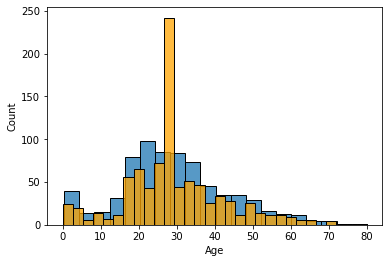

In [132]:
train_ttn['Age_filled'] = train_ttn.sort_values(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
print(train_ttn['Age'].isnull().sum())
print(train_ttn['Age_filled'].isnull().sum())
train_ttn['Age_filled'] = train_ttn['Age_filled'].astype(int)

test_ttn['Age_filled'] = test_ttn.sort_values(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
print(test_ttn['Age'].isnull().sum())
print(test_ttn['Age_filled'].isnull().sum())
test_ttn['Age_filled'] = test_ttn['Age_filled'].astype(int)

# So, with a new Age column the NA values of Age are solved. Lets now see the new distribution of age.

sns.histplot(train_ttn['Age'].dropna())
sns.histplot(train_ttn['Age_filled'], color = 'orange')

# There is a huge increase on the number of passengers aged 30.

In [133]:
# Now, to create age categories, I have to carefully consider the groups I define because I do not want to skew the data towards a group or several groups.

age_groups

# According to the age_groups variable, bins suggested are the following:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0','1','2','3','4','5','6','7']
train_ttn['Age_group'] = pd.cut(train_ttn['Age_filled'], bins, labels = age_labels, include_lowest = True)
train_ttn['Age_group'] = train_ttn['Age_group'].astype(int)

test_ttn['Age_group'] = pd.cut(test_ttn['Age_filled'], bins, labels = age_labels, include_lowest = True)
test_ttn['Age_group'] = test_ttn['Age_group'].astype(int)

In [134]:
fare_groups = pd.cut(train_ttn['Fare'], bins=6)
fare_groups

0      (-0.512, 85.388]
1      (-0.512, 85.388]
2      (-0.512, 85.388]
3      (-0.512, 85.388]
4      (-0.512, 85.388]
             ...       
886    (-0.512, 85.388]
887    (-0.512, 85.388]
888    (-0.512, 85.388]
889    (-0.512, 85.388]
890    (-0.512, 85.388]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.512, 85.388] < (85.388, 170.776] < (170.776, 256.165] < (256.165, 341.553] < (341.553, 426.941] < (426.941, 512.329]]

In [135]:
total_3 = test_ttn_2.isnull().sum().sort_values(ascending=False)
total_3.head(len(test_ttn_2.columns))

NameError: name 'test_ttn_2' is not defined

In [ ]:
test_ttn['fare_interval'] = test_ttn.sort_values(['Embarked', 'Pclass', 'Sex'])['Fare'].transform(lambda x: x.fillna(x.mean()))

for dataset in train_ttn:
    train_ttn.loc[ train_ttn['Fare'] <= 85.388, 'fare_interval'] = 0
    train_ttn.loc[(train_ttn['Fare'] > 85.388) & (train_ttn['Fare'] <= 170.776), 'fare_interval'] = 1
    train_ttn.loc[(train_ttn['Fare'] > 170.776) & (train_ttn['Fare'] <= 256.165), 'fare_interval']   = 2
    train_ttn.loc[(train_ttn['Fare'] > 256.165) & (train_ttn['Fare'] <= 341.533), 'fare_interval']   = 3
    train_ttn.loc[(train_ttn['Fare'] > 341.533) & (train_ttn['Fare'] <= 426.941), 'fare_interval']   = 4
    train_ttn.loc[ train_ttn['Fare'] > 426.941, 'Fare'] = 5
    train_ttn['fare_interval'] = train_ttn['fare_interval'].astype(int)
    
for dataset in test_ttn:
    test_ttn.loc[ test_ttn['Fare'] <= 85.388, 'fare_interval'] = 0
    test_ttn.loc[(test_ttn['Fare'] > 85.388) & (test_ttn['Fare'] <= 170.776), 'fare_interval'] = 1
    test_ttn.loc[(test_ttn['Fare'] > 170.776) & (test_ttn['Fare'] <= 256.165), 'fare_interval']   = 2
    test_ttn.loc[(test_ttn['Fare'] > 256.165) & (test_ttn['Fare'] <= 341.533), 'fare_interval']   = 3
    test_ttn.loc[(test_ttn['Fare'] > 341.533) & (test_ttn['Fare'] <= 426.941), 'fare_interval']   = 4
    test_ttn.loc[ test_ttn['Fare'] > 426.941, 'Fare'] = 5
    test_ttn['fare_interval'] = test_ttn['fare_interval'].astype(int)

In [ ]:
test_ttn.head()

In [ ]:
total_2 = train_ttn.isnull().sum().sort_values(ascending=False)
total_2.head(len(train_ttn.columns))

total_3 = test_ttn_2.isnull().sum().sort_values(ascending=False)
total_3.head(len(test_ttn_2.columns))

In [148]:
# In the final step of data preparation before modelling I am deleting from the datasets the columns that will not be used for modelling.

train_ttn_2 = train_ttn.drop(['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare', 'Embarked', 'Who', 'Age_filled'], axis = 1)

test_ttn_2 = test_ttn.drop(['Name', 'Sex', 'Age', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare', 'Age_filled'], axis = 1)

In [149]:
# Now that I have data prepared, I will start the modelling phase in which I will use several models and then compare them. Separating predictors and the outcome variable:

train_ttn_outcome = train_ttn_2['Survived']
train_ttn_predictors = train_ttn_2.drop('Survived', axis = 1)
test_ttn_without_id = test_ttn_2.drop('PassengerId', axis = 1).copy()

In [150]:
train_ttn_2.head()

,Survived,Pclass,number_relatives,alone,Deck,Title,gender,port_embarked,Age_group
0,0,3,1,0,8,1,0,0,2
1,1,1,1,0,3,3,1,1,3
2,1,3,0,1,8,2,1,0,2
3,1,1,1,0,3,3,1,0,3
4,0,3,0,1,8,1,0,0,3


In [151]:
test_ttn_2.head()

,PassengerId,Pclass,number_relatives,alone,Deck,Title,gender,port_embarked,Age_group
0,892,3,0,1,8,1,0,2,3
1,893,3,1,0,8,3,1,0,4
2,894,2,0,1,8,1,0,2,6
3,895,3,0,1,8,1,0,0,2
4,896,3,2,0,8,3,1,0,2


In [152]:
# Starting with the logistic regression, which seems to be the most obvious one.

logistic_regression = LogisticRegression()
logistic_regression.fit(train_ttn_predictors, train_ttn_outcome)

predicted_outcome_1 = logistic_regression.predict(test_ttn_without_id)
acc_logistic_regression = round(logistic_regression.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)
print(acc_logistic_regression)

81.93


In [153]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_ttn_predictors, train_ttn_outcome)
predicted_outcome_2 = decision_tree.predict(test_ttn_without_id)
acc_decision_tree = round(decision_tree.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)
print(acc_decision_tree)

89.23


In [154]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train_ttn_predictors, train_ttn_outcome)
predicted_outcome_3 = gaussian.predict(test_ttn_without_id)
acc_gaussian = round(gaussian.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)
print(acc_gaussian)

79.91


In [178]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(train_ttn_predictors, train_ttn_outcome)

predicted_outcome_4 = random_forest.predict(test_ttn_without_id)

random_forest.score(train_ttn_predictors, train_ttn_outcome)
acc_random_forest = round(random_forest.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)

print(acc_random_forest)

89.23


In [179]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_ttn_predictors, train_ttn_outcome) 
predicted_outcome_5 = knn.predict(test_ttn_without_id)
acc_knn = round(knn.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)
print(acc_knn)

86.31


In [180]:
# Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(train_ttn_predictors, train_ttn_outcome)

predicted_outcome_6 = perceptron.predict(test_ttn_without_id)

acc_perceptron = round(perceptron.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)
print(acc_perceptron)

80.25


C:\Users\pedro\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [181]:
# Linear Support Vector Machine

linear_svc = LinearSVC()
linear_svc.fit(train_ttn_predictors, train_ttn_outcome)

predicted_outcome_7 = linear_svc.predict(test_ttn_without_id)

acc_linear_svc = round(linear_svc.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)
print(acc_linear_svc)

C:\Users\pedro\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


81.48


In [182]:
# Stochastic Gradient Descent

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(train_ttn_predictors, train_ttn_outcome)
predicted_outcome_8 = sgd.predict(test_ttn_without_id)

sgd.score(train_ttn_predictors, train_ttn_outcome)

acc_sgd = round(sgd.score(train_ttn_predictors, train_ttn_outcome) * 100, 2)

print(acc_sgd)

78.79


In [183]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_logistic_regression, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

# RESUME HERE

,Model
Score,
89.23,Random Forest
89.23,Decision Tree
86.31,KNN
81.93,Logistic Regression
81.48,Support Vector Machines
80.25,Perceptron
79.91,Naive Bayes
78.79,Stochastic Gradient Decent


In [184]:
# So, lets evaluate the Random Forest (Classification). The following would be a great way to evaluate the RF model but in this dataset I do not have y_test. From the test dataset I do not know who survived and who did not.


# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))

In [185]:
# Getting the importance of each parameter (like the betas):

betas = pd.DataFrame ({'parameter': train_ttn_predictors.columns, 'weight': np.round(random_forest.feature_importances_, 3)})
betas = betas.sort_values('weight', ascending = False).set_index('parameter')

betas.head(len(train_ttn_predictors.columns))

,weight
parameter,
Title,0.226
gender,0.219
Age_group,0.131
Pclass,0.125
number_relatives,0.113
Deck,0.112
port_embarked,0.055
alone,0.018


In [188]:
# Since alone parameter seems to have a very low importance, I am going to drop it from the model and train it again.

train_ttn_predictors_2 = train_ttn_predictors.drop('alone', axis = 1)
test_ttn_without_id_2 = test_ttn_without_id.drop('alone', axis = 1)

random_forest.fit(train_ttn_predictors_2, train_ttn_outcome)
predicted_outcome_9 = random_forest.predict(test_ttn_without_id_2)
random_forest.score(train_ttn_predictors_2, train_ttn_outcome)
acc_random_forest = round(random_forest.score(train_ttn_predictors_2, train_ttn_outcome) * 100, 2)
print(acc_random_forest)

# The accuracy value is the same (89.23). Another way to test a RF model is using out-of-bag score.
oob_score = random_forest.oob_score_
print(oob_score)

89.23
0.8047138047138047


In [189]:
# Saw this on the internet, confusion matrix to evaluate the model. Credits to Niklas Donges.

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, train_ttn_predictors_2, train_ttn_outcome, cv=3)
confusion_matrix(train_ttn_outcome, predictions)

# The first row concerns to the value of zero in the Survived outcome variable (non-survivors). The second row concerns to the value of one (survivors).
# The first row means that my model has 483 true negatives (predicted non-survivers that actually died) and 66 false positives (survived and were classified as non-survivors).
# The second row means that my model has 107 incorrectly false positives (predicted survivors that actually died) and 249 true positives (predicted survivors that actually survived).

array([[483,  66],
       [107, 235]], dtype=int64)

In [194]:
# Classifiers precision. Credits too Niklas Donges.

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print('Precision: ', precision_score(train_ttn_outcome, predictions))
print('Recall: ', recall_score(train_ttn_outcome, predictions))
print('f1 score: ', f1_score(train_ttn_outcome, predictions))
# So, my model predicts correctly a passenger survival 78% of the times (precision) and it predicted survival of 69% of passengers who actually survived.
# f1 score is not perfect because it favours classifiers that have similar values of precision and recall and sometimes you want a high precision and sometimes a high recall. There is a precision-recall trade-off.

# Another method is using both ROC AUC Curve and ROC AUC Score. This curve plots the true positive against the false positive. Regarding the score, it is simply the area under the ROC AUC Curve. A 100% correct classifier has a ROC AUC Score of 1 and a completely random classifier would have a score of 0.5 (like flipping a coin). So, you want a score as close as possible to 1.
y_scores = random_forest.predict_proba(train_ttn_predictors_2)
y_scores = y_scores[:,1]
rocAucScore = roc_auc_score (train_ttn_outcome, y_scores)
print('ROC AUC Score: ', rocAucScore)

# ROC AUC Score is actually very good.

Precision:  0.7807308970099668
Recall:  0.6871345029239766
f1 score:  0.7309486780715396
ROC AUC Score:  0.9452646491760672
